In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('airlines_flights_data.csv')

# Columns Description 
1. airline :- name of the airline.
2. flight :- particular flight number.
3. source_city :- The city from which the flight departs — basically, the starting location of the journey.
4. departure_time :- the time when the flight will be depart like evening, morning , afternoon etc.
5. stops :- the number of stops the flight will take betwn the departure and destination city.
6. arrival_time :- The scheduled or actual local time when the flight reaches its destination airport.
7. destination_city :- the destination of the passengers.
8. class :- passengers travelled in which class.
9. duration :- particular time will take to complete the distance.
10. days_left :- kitne dine bache hai flight ko.
11. price :- kitne rupees ki flight ticket hai.

## Manual Assesment
1. drop index col
2. convert duration col datatype to int from float.
## Programatic Assesment
1. convert duration col datatype to int from float.
2. outlier in duration column.
3. outlier in price column.

In [3]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [5]:
df.sample(3)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
49525,49525,Indigo,6E-5017,Mumbai,Morning,zero,Afternoon,Delhi,Economy,2.17,34,3108
186659,186659,AirAsia,I5-319,Chennai,Morning,one,Late_Night,Delhi,Economy,15.17,44,2477
155674,155674,Indigo,6E-982,Hyderabad,Morning,one,Afternoon,Delhi,Economy,5.42,28,4431


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
df[df['duration'] == 49.830000]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [9]:
df[df['days_left'] == 49.000000]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9782,9782,Vistara,UK-975,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.00,49,2476
9783,9783,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9784,9784,Vistara,UK-981,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9785,9785,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,49,2700
9786,9786,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,49,2700
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df[df['price'] == 123071.000000]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [14]:
df.shape

(300153, 12)

In [15]:
df.describe(include=['O'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [16]:
df.memory_usage()

Index                   132
index               2401224
airline             2401224
flight              2401224
source_city         2401224
departure_time      2401224
stops               2401224
arrival_time        2401224
destination_city    2401224
class               2401224
duration            2401224
days_left           2401224
price               2401224
dtype: int64

In [17]:
df.drop(columns={'index'},inplace=True)

In [18]:
data_copy=df.copy()

### Univariate Analysis

In [19]:
data_copy['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

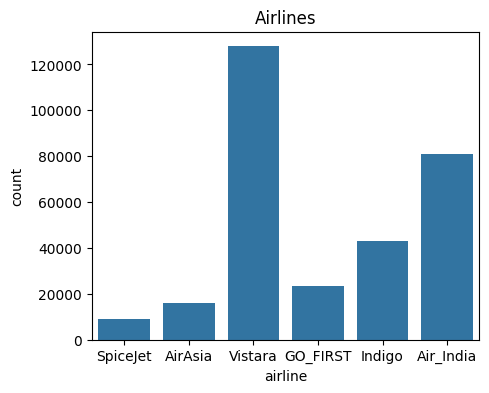

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x='airline',data=data_copy)
plt.title('Airlines')
plt.show()

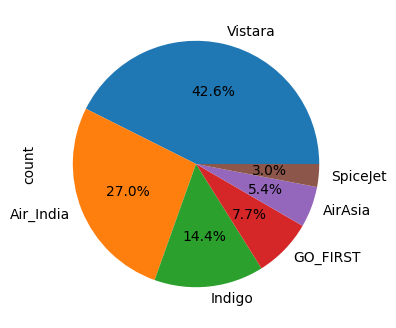

In [21]:
plt.figure(figsize=(4,4))
data_copy['airline'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [22]:
data_copy['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

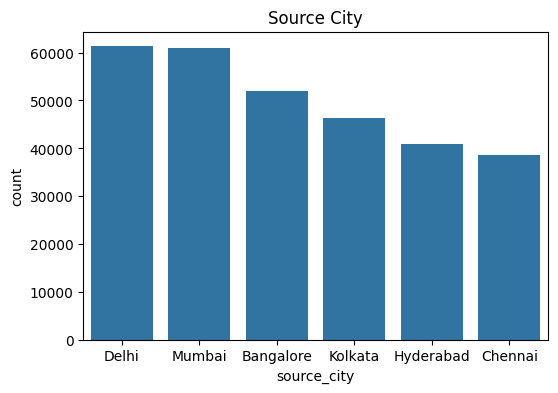

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='source_city',data=data_copy)
plt.title('Source City')
plt.show()

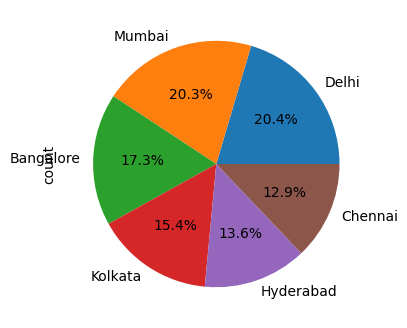

In [24]:
plt.figure(figsize=(4,4))
data_copy['source_city'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [25]:
data_copy['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

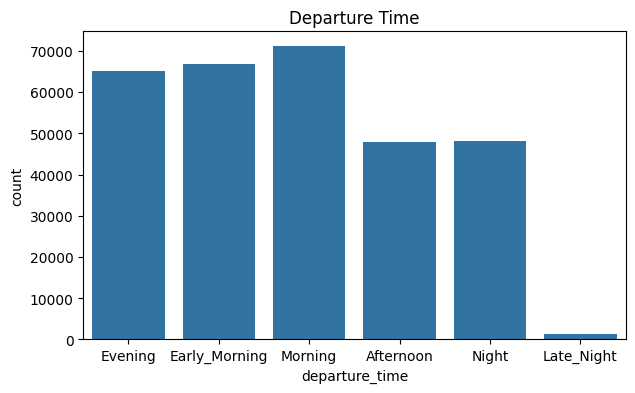

In [26]:
plt.figure(figsize=(7,4))
sns.countplot(x='departure_time',data=data_copy)
plt.title('Departure Time')
plt.show()

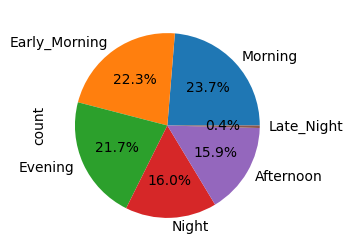

In [27]:
plt.figure(figsize=(3,3))
data_copy['departure_time'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [28]:
data_copy['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

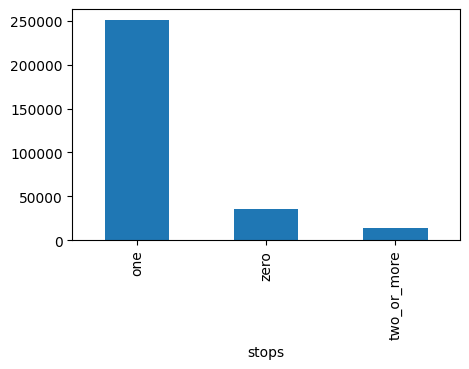

In [29]:
plt.figure(figsize=(5,3))
data_copy['stops'].value_counts().plot(kind='bar')
plt.show()

In [31]:
data_copy['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

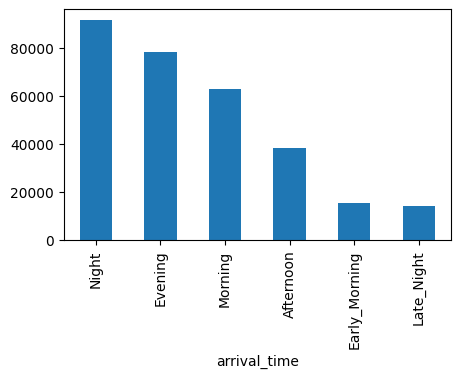

In [34]:
plt.figure(figsize=(5,3))
data_copy['arrival_time'].value_counts().plot(kind='bar')
plt.show()

In [36]:
data_copy['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

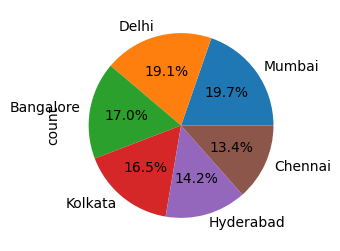

In [37]:
plt.figure(figsize=(5,3))
data_copy['destination_city'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [40]:
data_copy['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

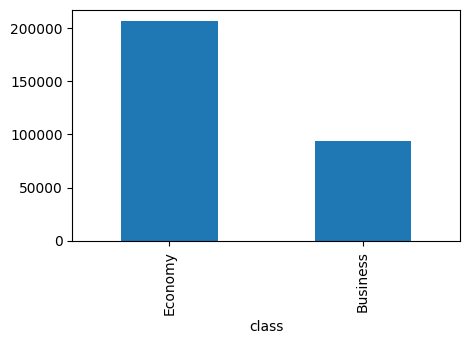

In [42]:
plt.figure(figsize=(5,3))
data_copy['class'].value_counts().plot(kind='bar')
plt.show()

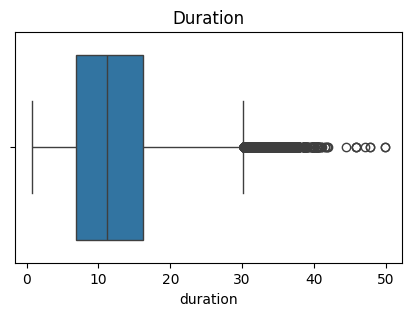

In [56]:
plt.figure(figsize=(5,3))
sns.boxplot(x='duration',data=data_copy)
plt.title('Duration')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_112692\1412853734.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['duration'])


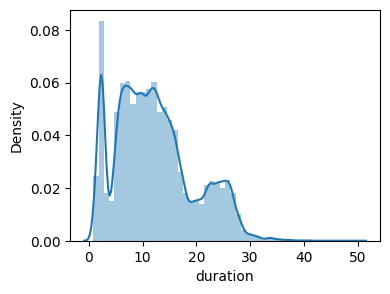

In [48]:
plt.figure(figsize=(4,3))
sns.distplot(data_copy['duration'])
plt.show()

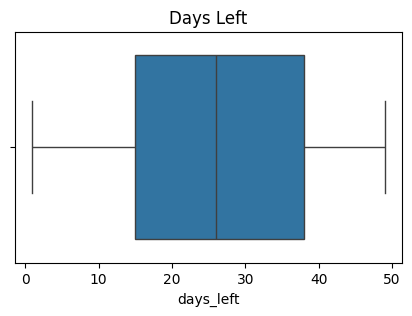

In [50]:
plt.figure(figsize=(5,3))
sns.boxplot(x='days_left',data=data_copy)
plt.title('Days Left')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_112692\2727176150.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['days_left'])


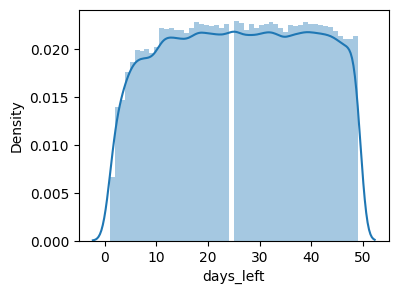

In [52]:
plt.figure(figsize=(4,3))
sns.distplot(data_copy['days_left'])
plt.show()

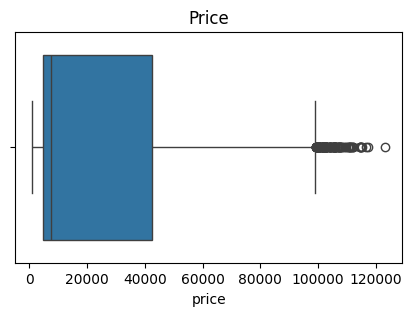

In [55]:
plt.figure(figsize=(5,3))
sns.boxplot(x='price',data=data_copy)
plt.title('Price')
plt.show()

### Bivariate Analysis
Numerical Vs Numerical 

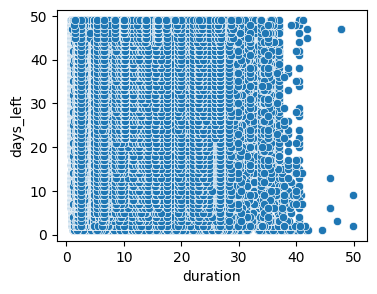

In [71]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='duration',y='days_left',data=data_copy)
plt.show()

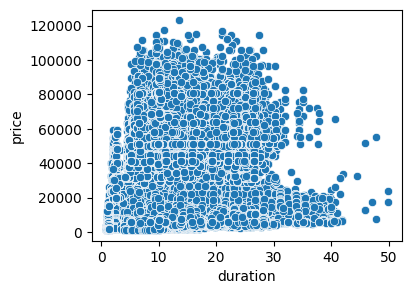

In [72]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='duration',y='price',data=data_copy)
plt.show()

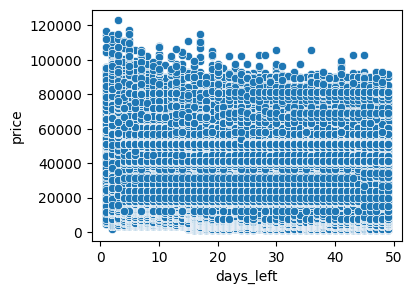

In [73]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='days_left',y='price',data=data_copy)
plt.show()

Numerical Vs Categorical

In [74]:
data_copy.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

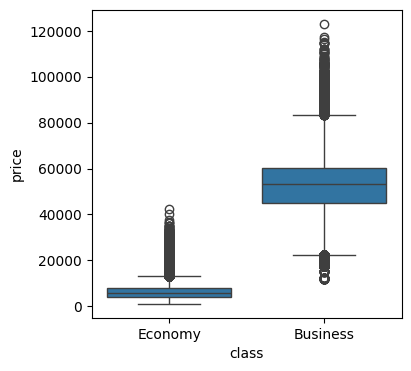

In [83]:
plt.figure(figsize=(4,4))
sns.boxplot(x='class',y='price',data=data_copy)
plt.show()

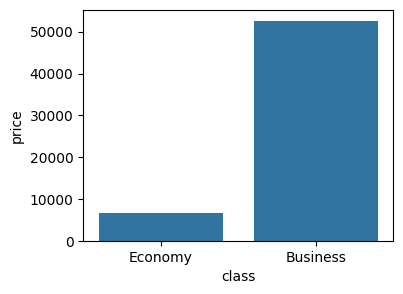

In [94]:
plt.figure(figsize=(4,3))
sns.barplot(x='class',y='price',data=data_copy)
plt.show()

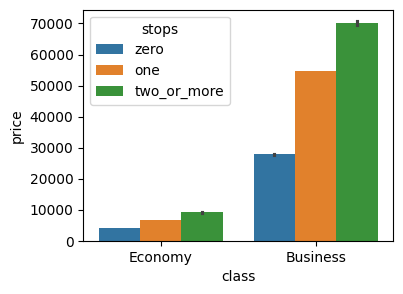

In [95]:
plt.figure(figsize=(4,3))
sns.barplot(x='class',y='price',hue='stops',data=data_copy)
plt.show()

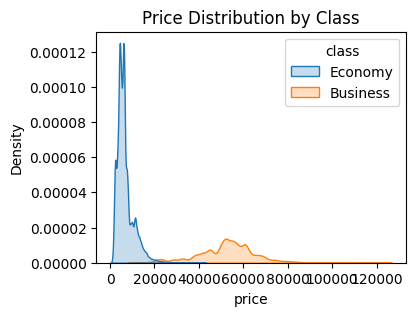

In [100]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=df,x='price',hue='class',fill=True)
plt.title("Price Distribution by Class")
plt.show()